In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

path = r"C:\Users\User\Downloads\Regional_Database_Food+Crime2.xlsx"

dfs = pd.read_excel(path, sheet_name=None)  # dict: {имя_листа: DataFrame}
# пример доступа к одному листу:
path = r"C:\Users\User\Downloads\Regional_Database_Food+Crime2.xlsx"

crime = pd.read_excel(path, sheet_name="Crime_Economics")
food  = pd.read_excel(path, sheet_name="FoodConsumption_TimeSeries")
expandatures = pd.read_excel(path, sheet_name="FoodExpenditure_Rubles").drop(columns=["Federal_District"])
nutrition = pd.read_excel(path, sheet_name="Nutrition_Analysis").drop(columns=["Federal_District"])
share = pd.read_excel(path, "FoodExpenditure_Share").drop(columns=["Federal_District"])
price_level = pd.read_excel(r"C:\Users\User\Downloads\Average_Cost_Rub_per_Unit.xlsx")
cols_to_exclude = ["region", "year", "Federal_District"]

num_cols = price_level.columns.difference(cols_to_exclude)

price_level[num_cols] = price_level[num_cols] * 12

from functools import reduce
dfs = [crime, food, expandatures, nutrition, share]

panel = reduce(
    lambda left, right: pd.merge(
        left, right,
        on=["region", "year"],
        how="inner"   # или "outer", если хочешь не терять строки
    ),
    dfs
)
# если Federal_District тебе больше не нужен:
price_level = price_level.drop(columns=["Federal_District"])

# добавляем в panel по ключам region + year
panel = panel.merge(
    price_level,
    on=["region", "year"],
    how="inner"   # или "left", если хочешь сохранить все строки panel
)
panel["Magnium_g"] = (
    panel["Bread_kg"]     * 0.70 +
    panel["Potatoes_kg"]  * 0.23 +
    panel["Vegetables_kg"]* 0.40 +
    panel["Fruits_kg"]    * 0.15 +
    panel["Meat_kg"]      * 0.22 +
    panel["Milk_kg"]      * 0.12 +  
    panel["Fish_kg"]      * 0.28 +
    panel["Sugar_kg"]     * 0.00 +
    panel["Oil_kg"]       * 0.00
)



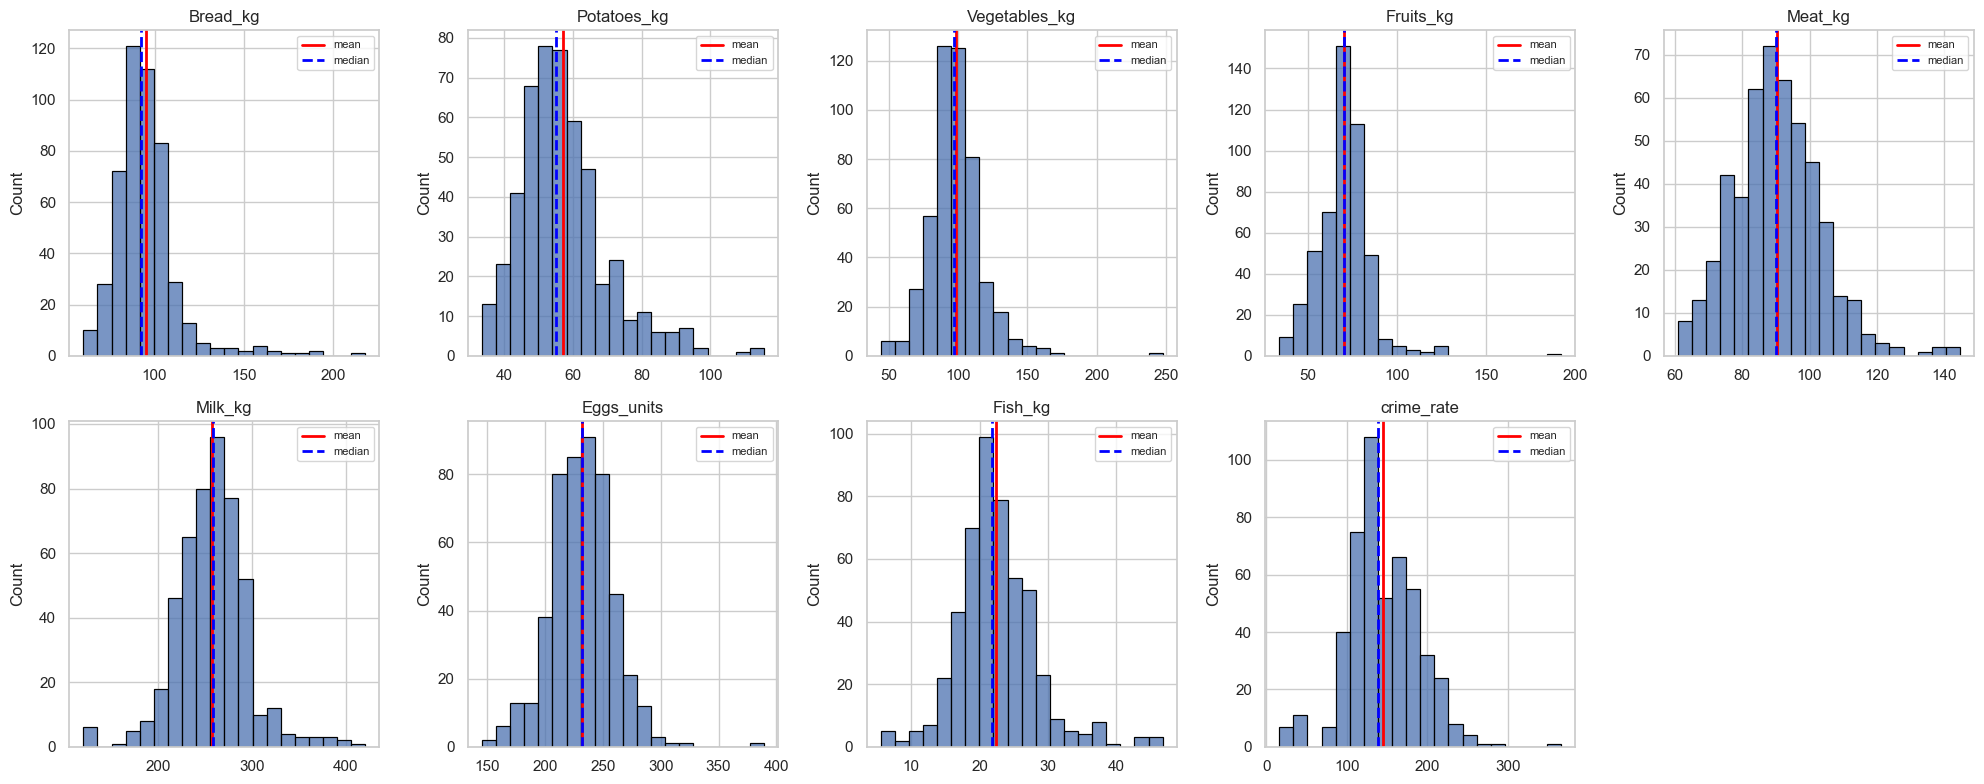

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = [
    'Bread_kg', 'Potatoes_kg', 'Vegetables_kg', 'Fruits_kg', 'Meat_kg',
    'Milk_kg', 'Eggs_units', 'Fish_kg', 'crime_rate'
]

sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    data = panel[col].dropna()

    # гистограмма
    sns.histplot(
        data=data,
        kde=False, bins=20,
        ax=ax, edgecolor='black'
    )

    # среднее и медиана
    mean_val = data.mean()
    med_val = data.median()

    ax.axvline(mean_val, color='red', linestyle='-', linewidth=2, label='mean')
    ax.axvline(med_val, color='blue', linestyle='--', linewidth=2, label='median')

    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

    # показывать легенду только один раз или на всех (по желанию)
    ax.legend(fontsize=8)

# убрать лишние оси, если они есть
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
